<a href="https://colab.research.google.com/github/hufsaim/T10306201/blob/master/notebook_2022/Lab05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!python -m pip install pyradiomics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 188 kB 5.9 MB/s 
     |████████████████████████████████| 52.8 MB 2.3 MB/s 
     |████████████████████████████████| 109 kB 49.5 MB/s 
     |████████████████████████████████| 500 kB 42.6 MB/s 
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=c9aa767a1a1916ca67ccf6cecc62fc37c12bedaf4451e905a586b34c1c36955c
  Stored in directory: /root/.cache/pip/wheels/72/b0/3f/1d95f96ff986c7dfffe46ce2be4062f38ebd04b506c77c81b9
Successfully built docopt


In [3]:
import os
import glob
import matplotlib.pyplot as plt
import SimpleITK as sitk

In [4]:
plist = glob.glob('/content/Brats18*seg.nii.gz')
print(plist)

['/content/Brats18_2013_28_1_seg.nii.gz']


In [5]:
plist_img = glob.glob('/content/Brats18*t1ce.nii.gz')
print(plist_img)

['/content/Brats18_2013_28_1_t1ce.nii.gz']


In [6]:
import nibabel as nib

In [8]:
n = 0
img = nib.load(plist_img[n])
seg = nib.load(plist[n])
#print(img)

In [9]:
I = img.get_fdata()
seg = seg.get_fdata()
print(seg.shape)

(240, 240, 155)


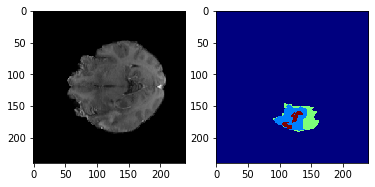

In [11]:
plt.subplot(122)
plt.imshow(seg[:,:,64],cmap='jet',interpolation='nearest')
plt.subplot(121)
plt.imshow(I[:,:,64],cmap='gray',interpolation='nearest')

### Feature extraction using PyRadiomics
- numpy arrays로 정의된 image, segmentation 이용.

In [12]:
import radiomics
from radiomics import featureextractor

In [13]:
# First define the settings
settings = {}
settings['binWidth'] = 20
settings['sigma'] = [1]
settings['normalize']=True
settings['geometryTolerance']=1
# Instantiate the extractor
extractor = featureextractor.RadiomicsFeatureExtractor(**settings)  # ** 'unpacks' the dictionary in the function call
# Enable a filter (in addition to the 'Original' filter already enabled)
#extractor.enableImageTypeByName('LoG')
#extractor.enableImageTypeByName('Wavelet')
print('Extraction parameters:\n\t', extractor.settings)
print('Enabled filters:\n\t', extractor.enabledImagetypes)  # Still the default parameters
print('Enabled features:\n\t', extractor.enabledFeatures)  # Still the default parameters

INFO:radiomics.featureextractor:No valid config parameter, using defaults: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
INFO:radiomics.featureextractor:Enabled image types: {'Original': {}}
INFO:radiomics.featureextractor:Enabled features: {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}
INFO:radiomics.featureextractor:Applying custom setting overrides: {'binWidth': 20, 'sigma': [1], 'normalize': True, 'geometryTolerance': 1}


Extraction parameters:
	 {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': True, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True, 'binWidth': 20, 'sigma': [1], 'geometryTolerance': 1}
Enabled filters:
	 {'Original': {}}
Enabled features:
	 {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}


In [14]:
image = sitk.GetImageFromArray(I)
mask = sitk.GetImageFromArray(seg)

In [15]:
features = extractor.execute(image,mask)

INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
INFO:radiomics.featureextractor:Computing shape
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder
INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm


In [16]:
feature_names = list((filter(lambda k: k.startswith("original_"),features)))
print(feature_names)

['original_shape_Elongation', 'original_shape_Flatness', 'original_shape_LeastAxisLength', 'original_shape_MajorAxisLength', 'original_shape_Maximum2DDiameterColumn', 'original_shape_Maximum2DDiameterRow', 'original_shape_Maximum2DDiameterSlice', 'original_shape_Maximum3DDiameter', 'original_shape_MeshVolume', 'original_shape_MinorAxisLength', 'original_shape_Sphericity', 'original_shape_SurfaceArea', 'original_shape_SurfaceVolumeRatio', 'original_shape_VoxelVolume', 'original_firstorder_10Percentile', 'original_firstorder_90Percentile', 'original_firstorder_Energy', 'original_firstorder_Entropy', 'original_firstorder_InterquartileRange', 'original_firstorder_Kurtosis', 'original_firstorder_Maximum', 'original_firstorder_MeanAbsoluteDeviation', 'original_firstorder_Mean', 'original_firstorder_Median', 'original_firstorder_Minimum', 'original_firstorder_Range', 'original_firstorder_RobustMeanAbsoluteDeviation', 'original_firstorder_RootMeanSquared', 'original_firstorder_Skewness', 'orig

In [17]:
for j in range(len(feature_names)):
  print(j,feature_names[j],features[feature_names[j]])

0 original_shape_Elongation 0.7533119796040897
1 original_shape_Flatness 0.6443580138680817
2 original_shape_LeastAxisLength 37.57584292124421
3 original_shape_MajorAxisLength 58.31516348446789
4 original_shape_Maximum2DDiameterColumn 52.40229002629561
5 original_shape_Maximum2DDiameterRow 62.297672508690084
6 original_shape_Maximum2DDiameterSlice 66.48308055437865
7 original_shape_Maximum3DDiameter 70.68946173228369
8 original_shape_MeshVolume 50105.125
9 original_shape_MinorAxisLength 43.92951124542063
10 original_shape_Sphericity 0.4696461162538371
11 original_shape_SurfaceArea 13994.847030953128
12 original_shape_SurfaceVolumeRatio 0.2793096919916501
13 original_shape_VoxelVolume 50041.0
14 original_firstorder_10Percentile 1.3031418316020564
15 original_firstorder_90Percentile 2.159491281085587
16 original_firstorder_Energy 151226.8685396885
17 original_firstorder_Entropy 0.0014719447920251048
18 original_firstorder_InterquartileRange 0.4281747247417651
19 original_firstorder_Kurto